# Exercise Set 11

Due: **10:00 27 June 2022**

Discussion: **13:00 1 July 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

Tom Carron

In [18]:
#imports and makle plots high res
import numpy as np 
import pandas as pd 
import scipy.interpolate
import seaborn as sb 
import matplotlib.pyplot as plt 
import matplotlib
from scipy import signal
matplotlib.rcParams["figure.dpi"]=300

# 1. Interpolating a function of one variable **[50 points]**

Load the data in `sparse_1.dat`. You will try to find a smooth the data using interpolation.

In [19]:
df=pd.read_csv("sparse_1.dat",sep="\s+",header=None,names=["x","y"],skiprows=1,dtype=np.float64)
x=df["x"].to_numpy()
y=df["y"].to_numpy()

**a)** Plot the data. Can you identify the trend? **10 points** \
\
The trend looks like a signal at x=0, and some random noise elsewhere, although there are very few data points.

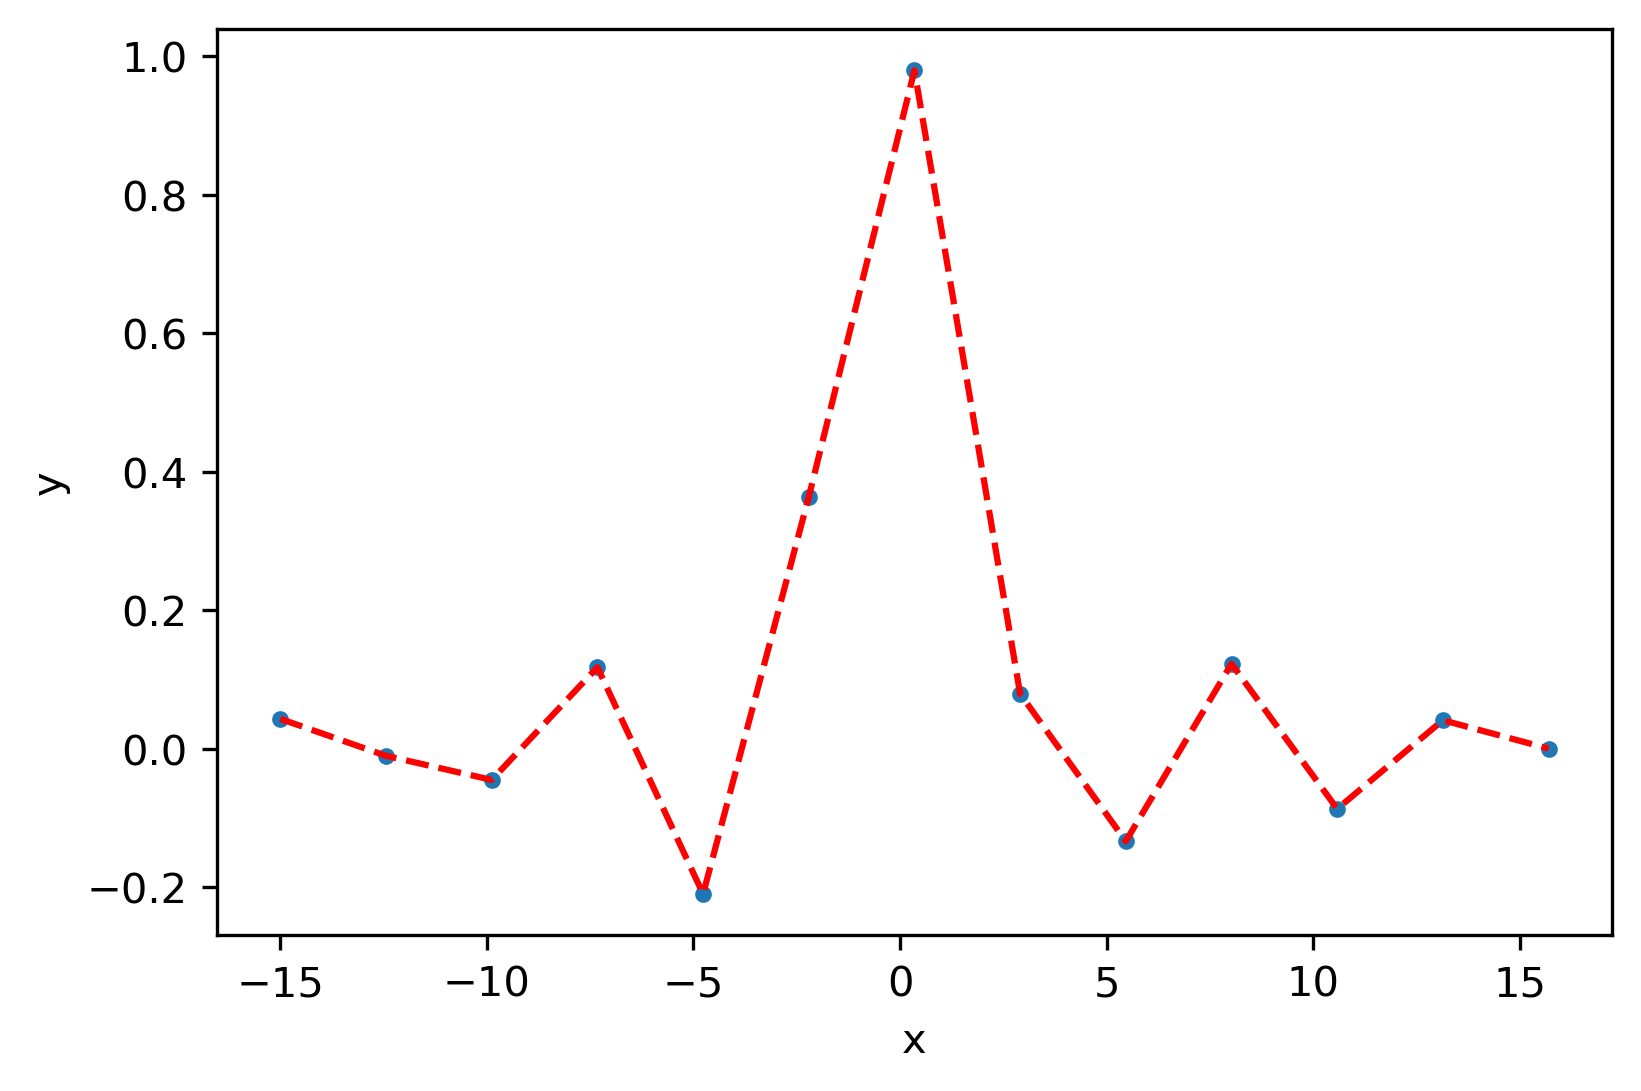

In [20]:
plt.figure()
plt.scatter(df["x"],df["y"],s=9)
plt.plot(df["x"],df["y"],"--",color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("plots/xy.png",dpi=300,bbox_inches="tight")

**b)** Smooth the data by interpolating the data at a larger number of $x$-coordinates. You can use the `interp1d` method in `scipy.interpolate` using the linear method (or interpolate the points manually). Plot your interpolated points with the original data points **20 points**

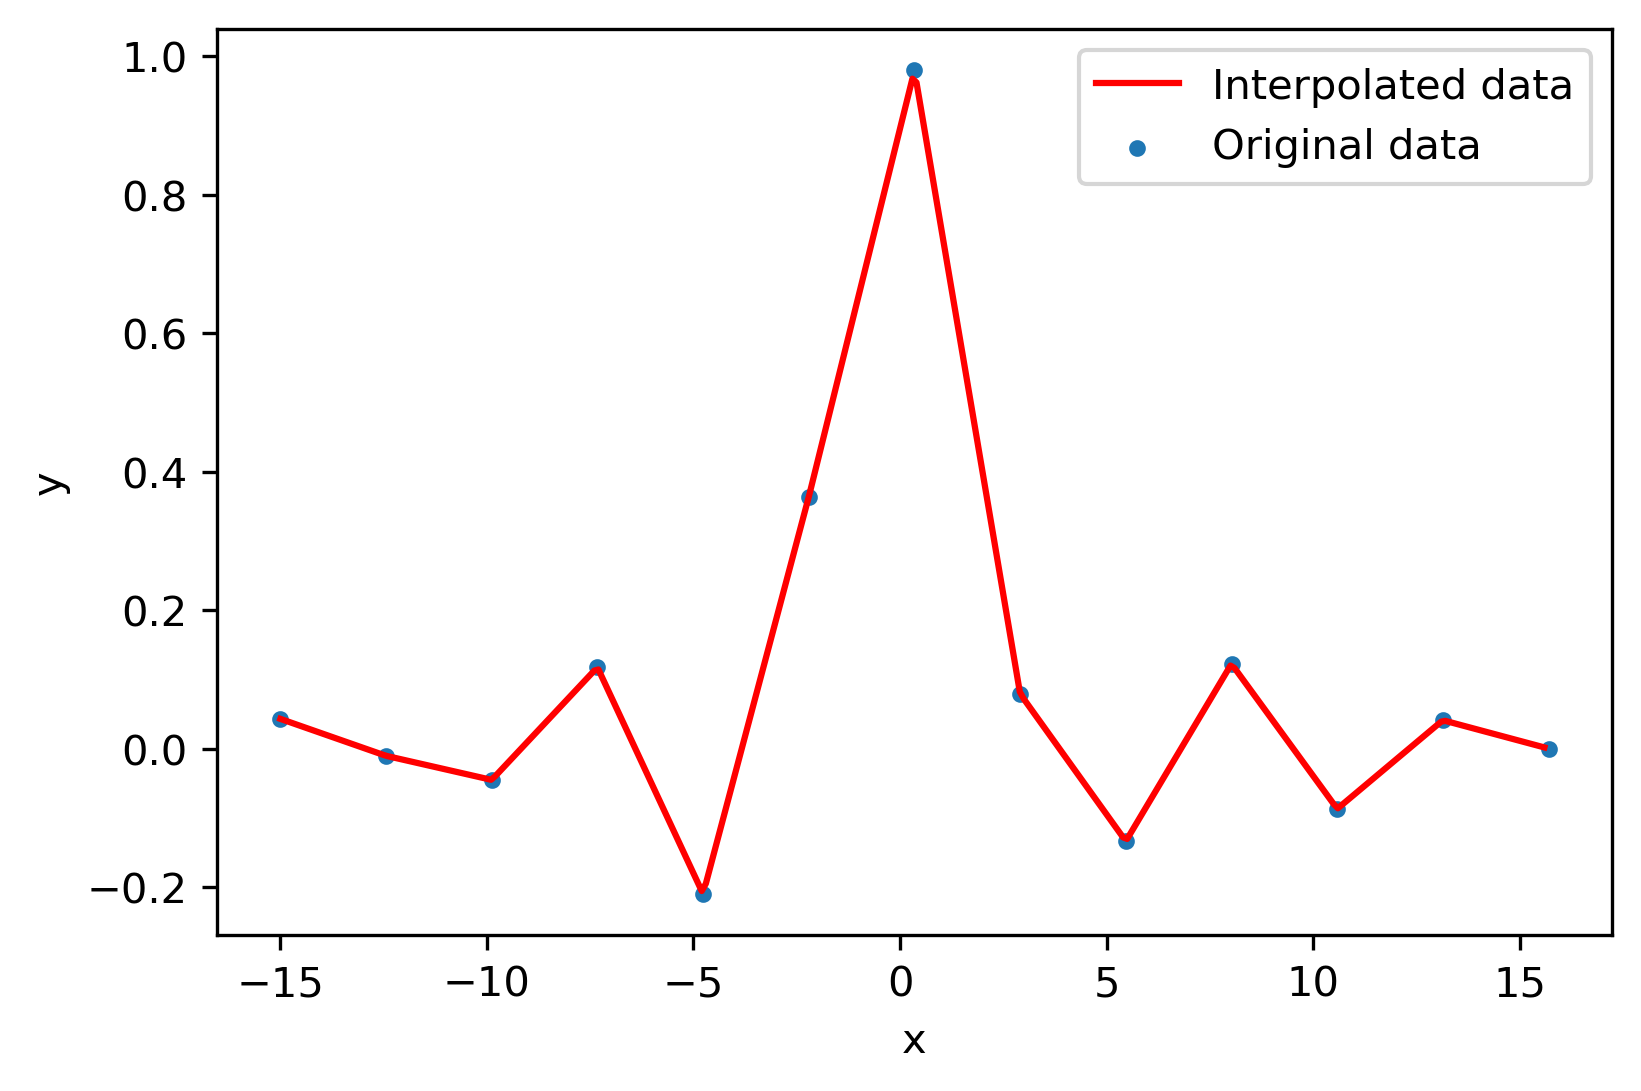

In [21]:
#generate interpolated function
f=scipy.interpolate.interp1d(x,y,kind="linear")
#dummy x-values for interpolation
xnew=np.arange(np.min(x),np.max(x),0.1)
#interpolated y-values
ynew=f(xnew)
#plot the interpolated points with the original data points
plt.figure()
plt.plot(xnew,ynew,'-',color='red',label='Interpolated data')
plt.scatter(x,y,s=9,label='Original data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("plots/interp.png",dpi=300,bbox_inches="tight")

**c)** Test a few other methods ('nearest', 'zero', 'slinear', 'quadratic', and 'cubic') to interpolate the data. Compare them to the linear method. Which appears to be most accurate? Can you identify the underlying function? **20 points**

All of the interpolation methods seem to be rather accurate, however the underlying function seems to be a sinc x function ((sin x) / x), so I think the cubic interpolation is the most accurate interpolation.

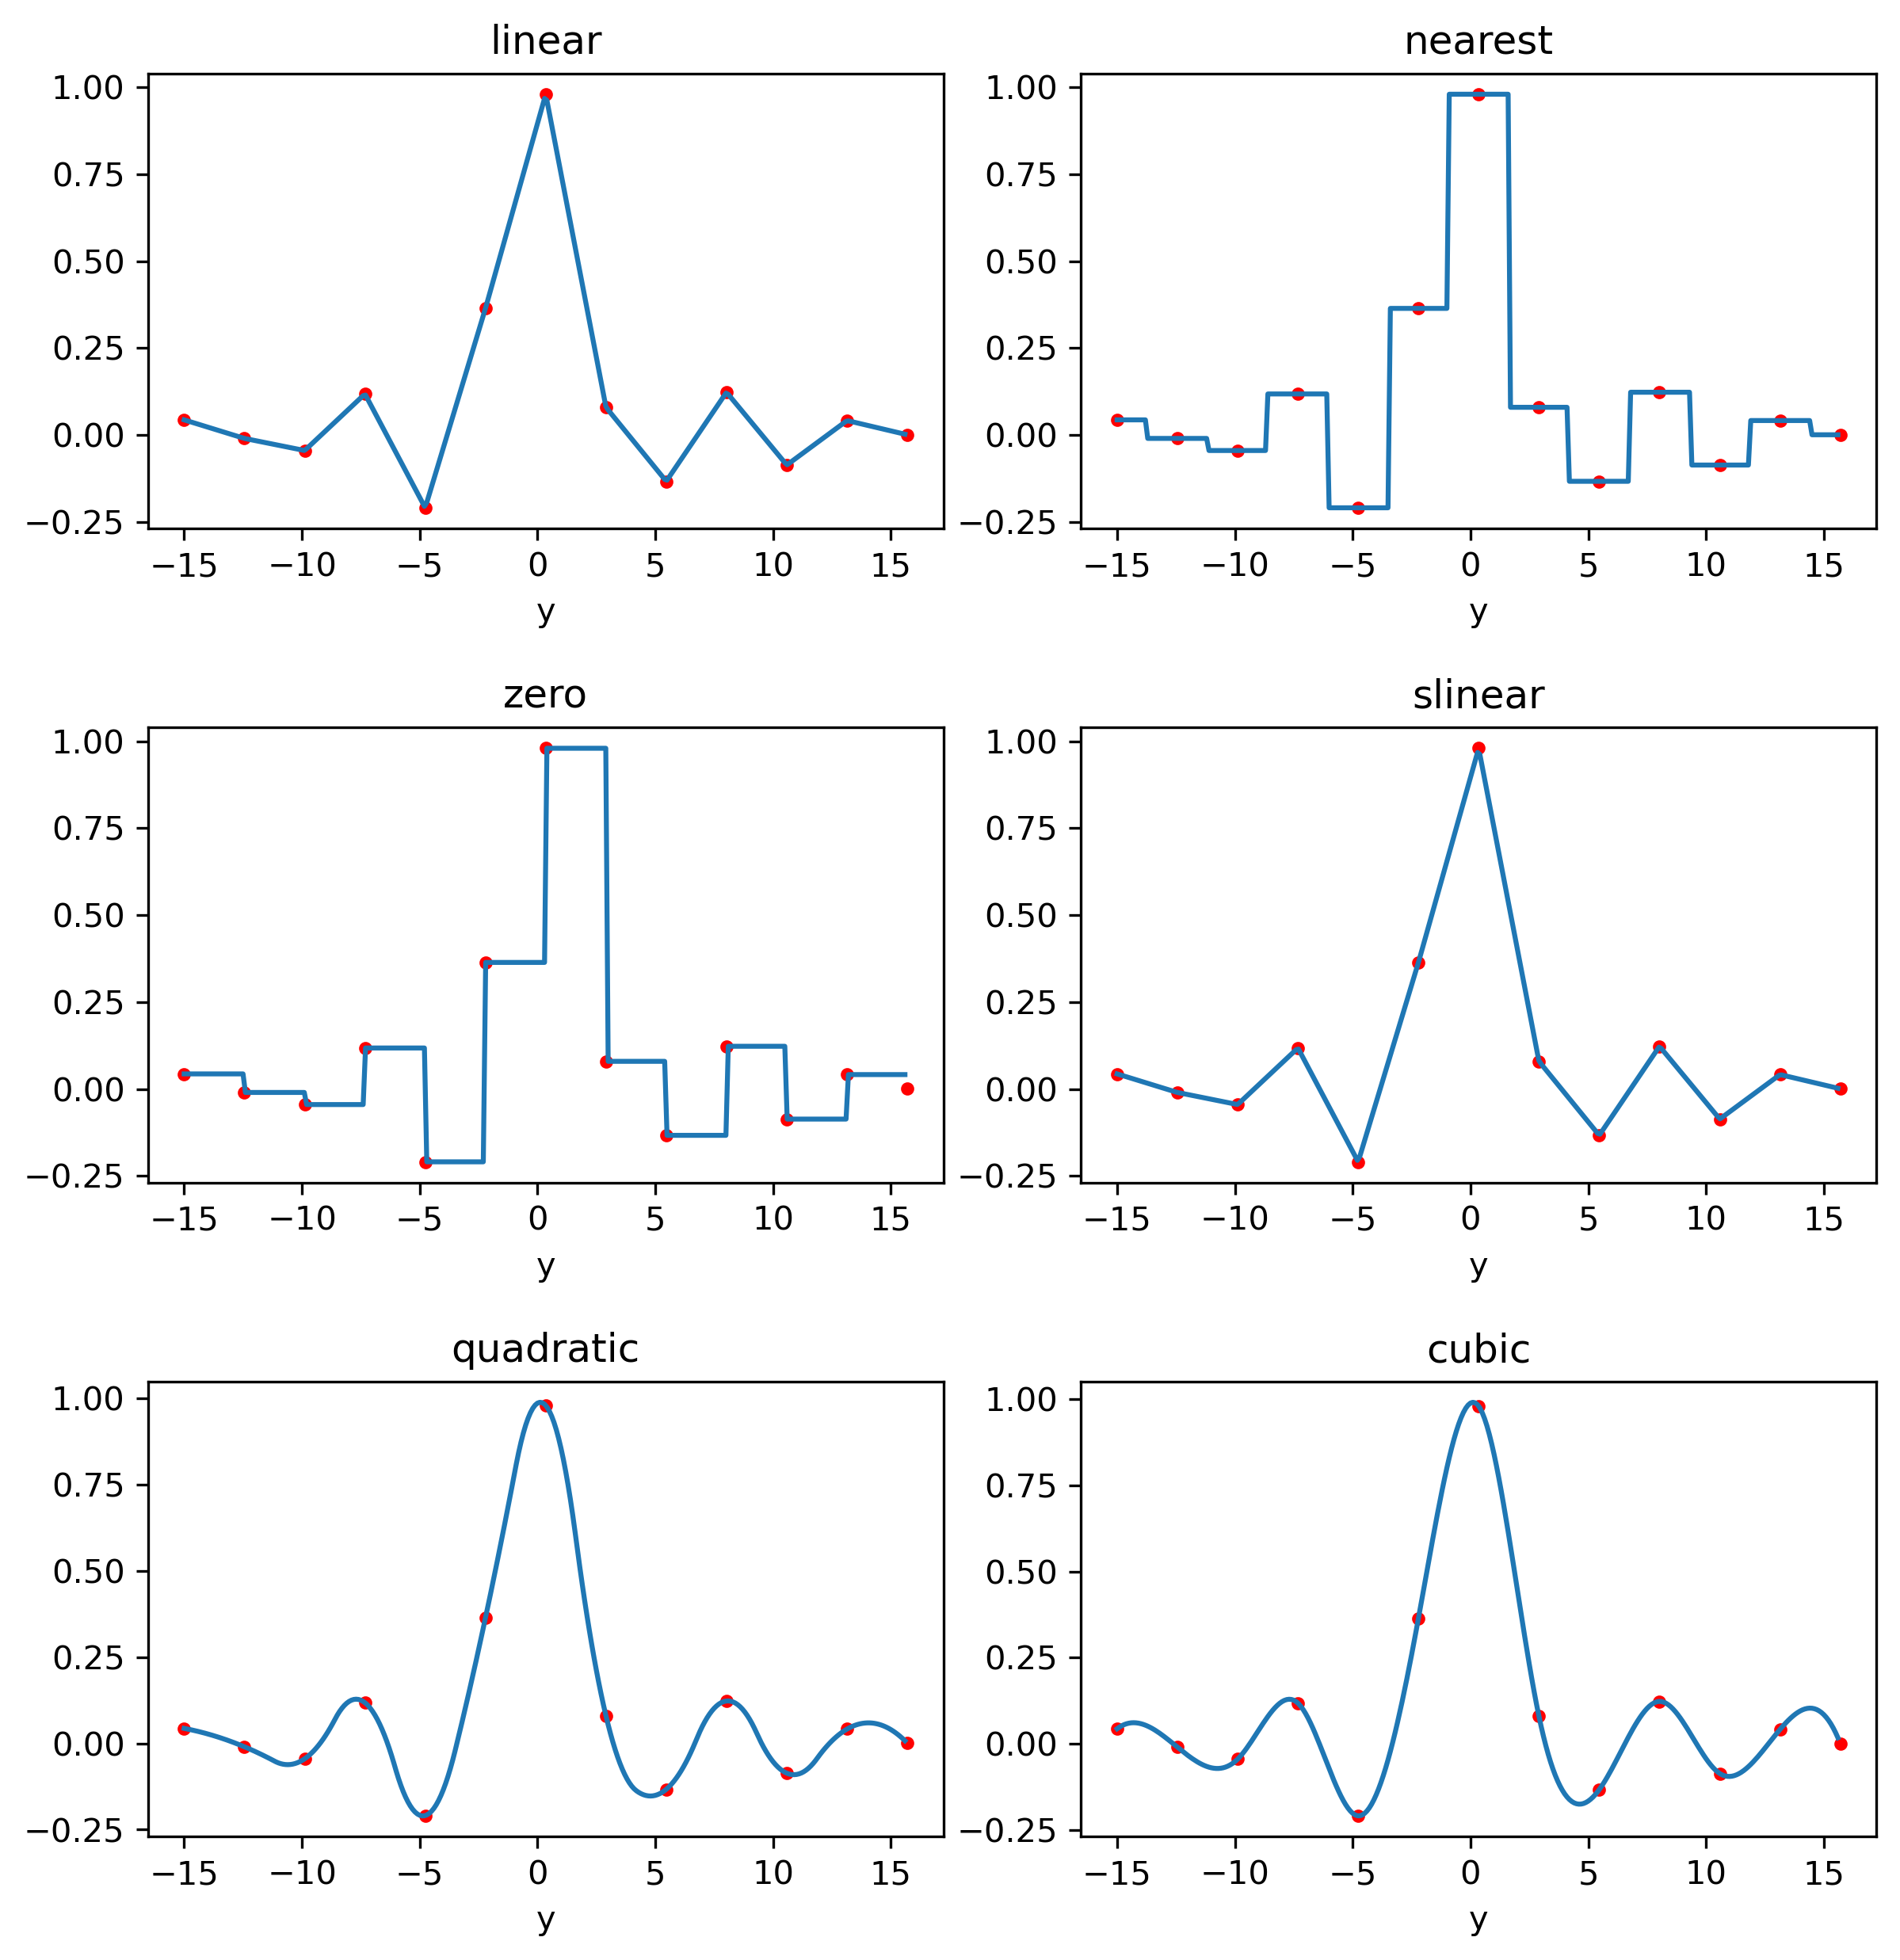

In [22]:
methods=['linear','nearest', 'zero', 'slinear', 'quadratic', 'cubic']
xnew=np.arange(np.min(x),np.max(x),0.1)
fig,axs=plt.subplots(3,2,figsize=(8,8))
fig.tight_layout(h_pad=4)
for i in range(len(methods)):
    method=methods[i]
    f=scipy.interpolate.interp1d(x,y,kind=method)
    ynew=f(xnew)
    if i%2==0:
        k,l=int(i/2),int(0)
    else:
        k,l=int(i/2-1/2),int(1)
    axs[k,l].plot(xnew,ynew)#,label='Interpolated data')
    axs[k,l].scatter(x,y,s=9,color="r")
    axs[k,l].set_title(method)
    axs[k,l].set_xlabel("x")
    axs[k,l].set_xlabel("y")

    #axs[k,l].legend()



plt.savefig("plots/interpolations.png",dpi=300,bbox_inches="tight")

# 2. Smoothing a noisy signal **[50 points]**

Load the data in `data_noisy.dat`. Here you will find columns for $x$, $y_1$, and $y_2$. You will investigate how well the data can be smoothed using different filters.

In [23]:
#load the file
df=pd.read_csv("data_noisy.dat",sep="\s+",header=None,names=["x","y1","y2"],skiprows=1,dtype=np.float64)
y1=df["y1"].to_numpy()
y2=df["y2"].to_numpy()

In [24]:
#moving average of x with w points
def moving_average(x, w):
    # Convert array of integers to pandas series
    numbers_series = pd.Series(x)
    
    # Get the window of series
    # of observations of specified window size
    windows = numbers_series.rolling(w)
    
    # Create a series of moving
    # averages of each window
    moving_averages = windows.mean()
    
    # Convert pandas series back to list
    moving_averages_list = moving_averages.tolist()
    
    # Remove null entries from the list
    final_list = moving_averages_list[w - 1:]
    #print(len(final_list))
    return final_list

In [25]:
#triangular smooth of x with w points
def smoothTriangle(x, w):
    triangle=np.concatenate((np.arange(w + 1), np.arange(w)[::-1])) # up then down
    smoothed=[]

    for i in range(w, len(x) - w * 2):
        point=x[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(w + w/2) + smoothed
    while len(smoothed) < len(x):
        smoothed.append(smoothed[-1])
    #print(len(smoothed))
    return smoothed

**a)** Apply a moving-average filter to both datasets with $10$- and $20$-point filters. Compare this to $10$- and $20$-point triangular smoothing of both datasets. Discuss the difference between these methods, and how accurate is the interpolated data. Plot any filtered data with the original dataset. **20 points**

Below we see the original data plotted with the filtered data overplotted. The 20 point smoothing in both the triangular smoothing and moving average cases results in a "smoother" filtering. The triangular smoothing also provides a slightly lower estimate of the average at each x value in both cases. In both cases the smoothing is quite accurate.

In [26]:
#moving average filter for 10 and 20 point filters for both data sets
ma_10_y1=moving_average(df["y1"].to_numpy(),10)
ma_20_y1=moving_average(df["y1"].to_numpy(),20)
ma_10_y2=moving_average(df["y2"].to_numpy(),10)
ma_20_y2=moving_average(df["y2"].to_numpy(),20)
#triangluar smooth for 10 and 20 point filters of both data sets
tri_10_y1=smoothTriangle(df["y1"].to_numpy(),10)
tri_20_y1=smoothTriangle(df["y1"].to_numpy(),20)
tri_10_y2=smoothTriangle(df["y2"].to_numpy(),10)
tri_20_y2=smoothTriangle(df["y2"].to_numpy(),20)

In [27]:
#smoothed arrays are slightly shorter due to edges not having enough neighbours to filter over
#x_10=df["x"].to_numpy()
#x_20=df["x"].to_numpy()
print(len(df["x"].to_numpy()))

1000


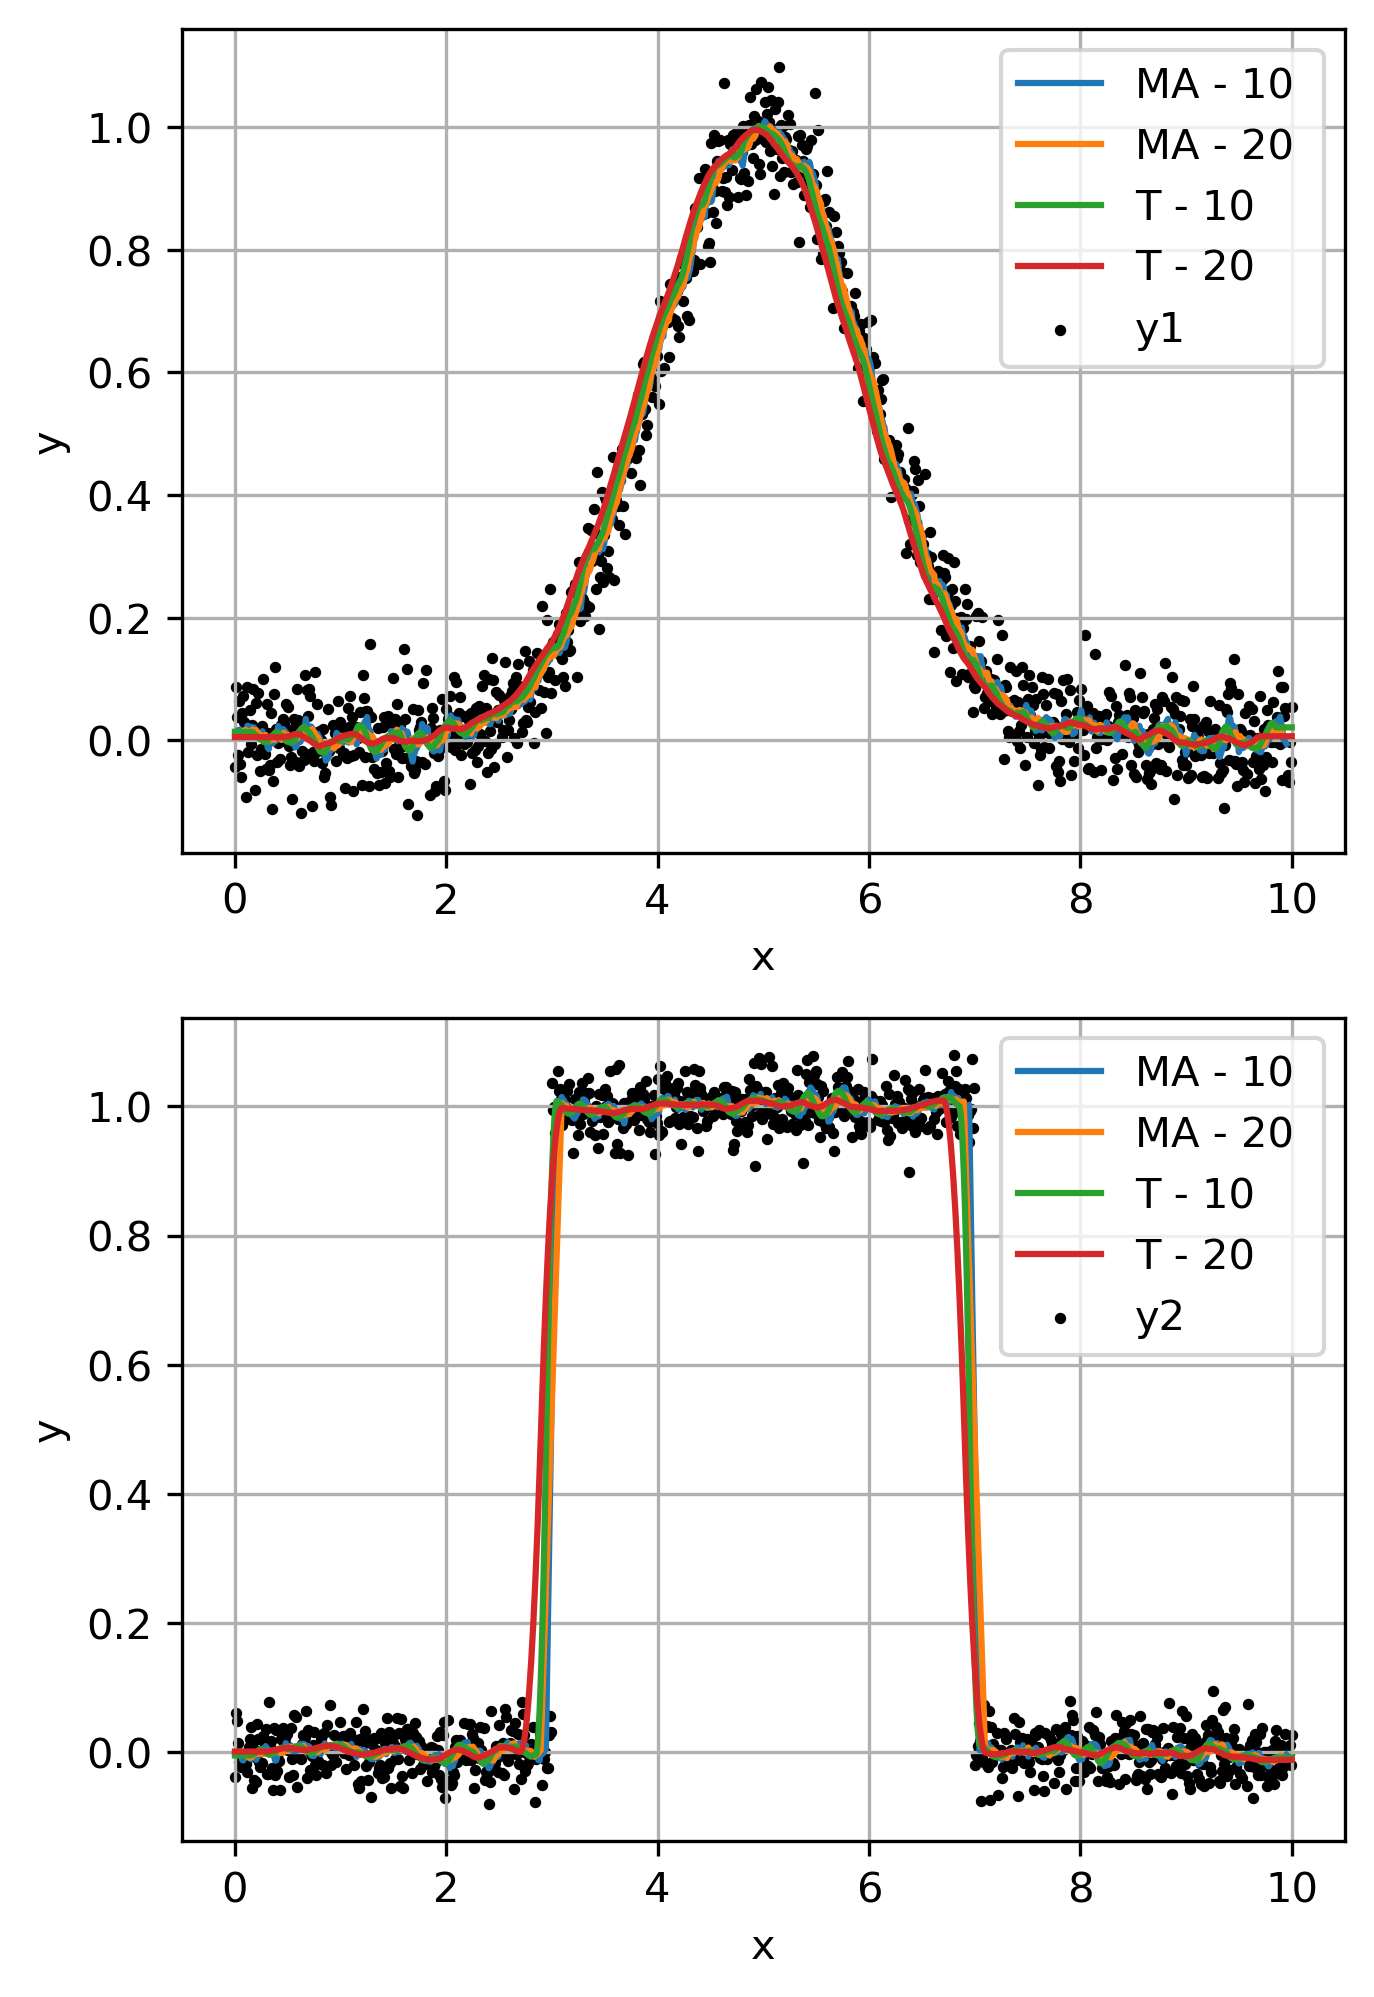

In [28]:
fig, ax = plt.subplots(2,figsize=(5,8))
x=df["x"].to_numpy()
x2=df["x"].to_numpy()[4:-5]
x3=df["x"].to_numpy()[9:-10]
ax[0].scatter(x,df["y1"].to_numpy(),color="black",s=3,label="y1")
ax[0].plot(x2,ma_10_y1,label="MA - 10 ")
ax[0].plot(x3,ma_20_y1,label="MA - 20 ")
ax[0].plot(x,tri_10_y1,label="T - 10")
ax[0].plot(x,tri_20_y1,label="T - 20")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend()
ax[0].grid()
ax[1].scatter(x,df["y2"].to_numpy(),color="black",s=3,label="y2")
ax[1].plot(x2,ma_10_y2,label="MA - 10 ")
ax[1].plot(x3,ma_20_y2,label="MA - 20 ")
ax[1].plot(x,tri_10_y2,label="T - 10 ")
ax[1].plot(x,tri_20_y2,label="T - 20 ")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].legend()
ax[1].grid()

**b)** Apply the Savitzky-Golay filter to both datasets and plot them. How does this method compare to the previous ones? **30 points**

This method is less "smooth" than ther other methods and contains more "noise".

In [29]:
y1_sg_11 = signal.savgol_filter(y1, window_length=11, polyorder=2, mode="nearest")
y1_sg_21 = signal.savgol_filter(y1, window_length=21, polyorder=2, mode="nearest")
y2_sg_11 = signal.savgol_filter(y2, window_length=11, polyorder=2, mode="nearest")
y2_sg_21 = signal.savgol_filter(y2, window_length=21, polyorder=2, mode="nearest")

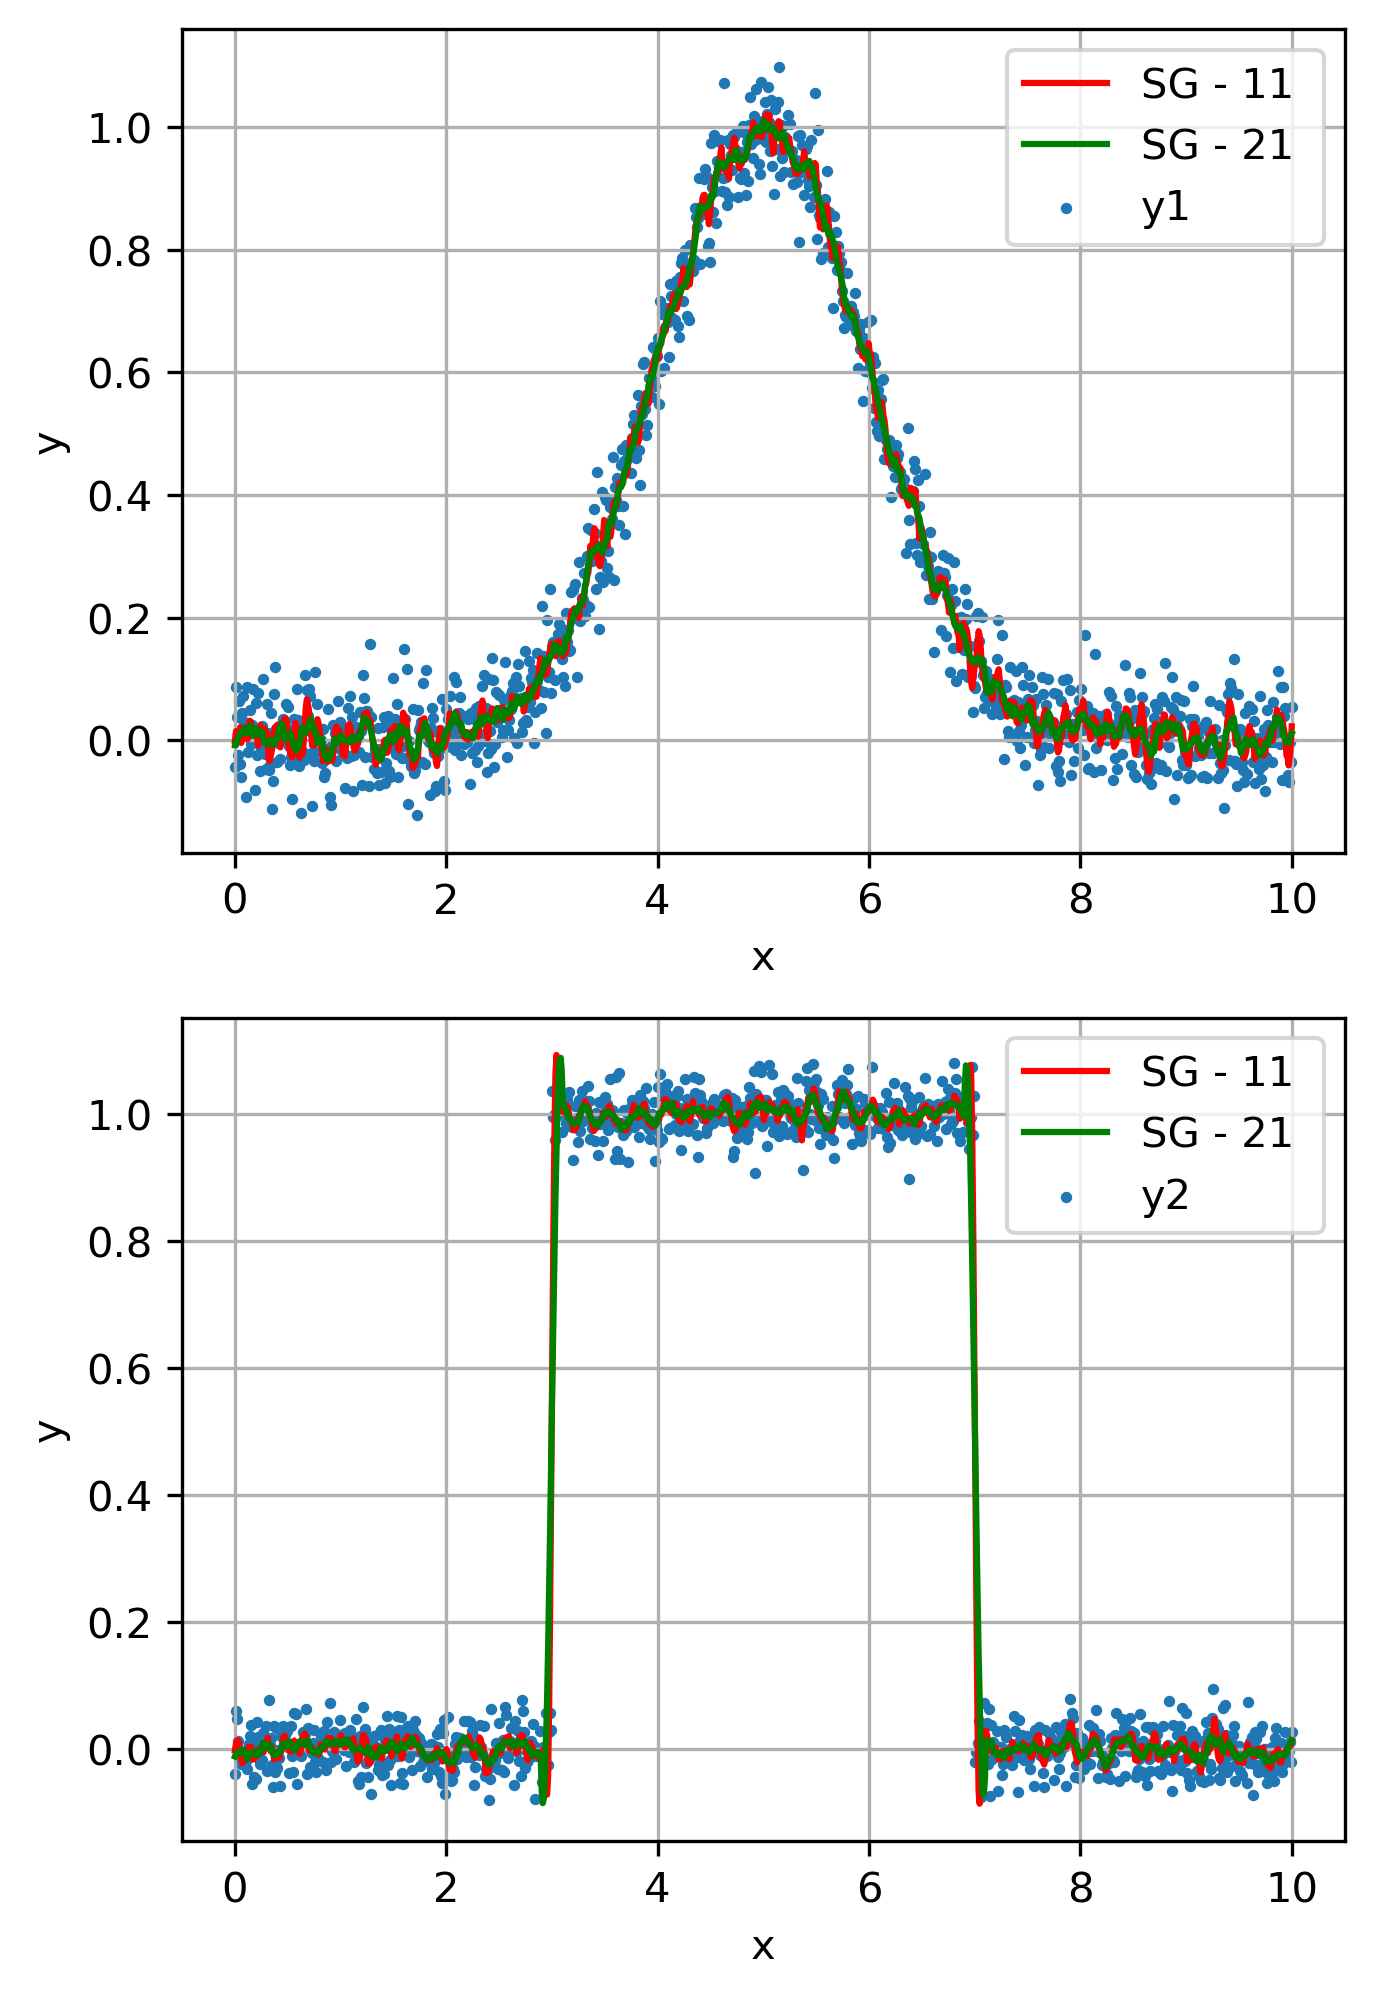

In [30]:
fig, ax = plt.subplots(2,figsize=(5,8))
x=df["x"].to_numpy()
ax[0].scatter(x,y1,s=3,label="y1")
ax[0].plot(x,y1_sg_11,color='r',label="SG - 11 ")
ax[0].plot(x,y1_sg_21,color='g',label="SG - 21 ")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend()
ax[0].grid()
ax[1].scatter(x,y2,s=3,label="y2")
ax[1].plot(x,y2_sg_11,color='r',label="SG - 11 ")
ax[1].plot(x,y2_sg_21,color='g',label="SG - 21 ")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].legend()
ax[1].grid()